# Proof of concept
## Concensiousness

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import os
import mne
import numpy as np
from mne.decoding import CSP
import matplotlib.pyplot as plt



In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import LeaveOneOut, cross_validate

## Import Data

In [4]:
data_loo = mne.io.read_epochs_eeglab(input_fname = "./data/Subject_11_H_AEP_Run_01.set")
data_tst = mne.io.read_epochs_eeglab(input_fname = "./data/Subject_11_H_AEP_Run_02.set")

print(data_loo.info)
print(data_tst.info)

Extracting parameters from c:\Users\maxim\OneDrive\Documents\2IA3A\man_machine_interaction\poc_concensiousness\data\Subject_11_H_AEP_Run_01.set...
Not setting metadata
480 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from c:\Users\maxim\OneDrive\Documents\2IA3A\man_machine_interaction\poc_concensiousness\data\Subject_11_H_AEP_Run_02.set...
Not setting metadata
480 matching events found
No baseline correction applied
0 projection items activated
Ready.
<Info | 8 non-empty values
 bads: []
 ch_names: FCz, C3, Cz, C4, CP1, CPZ, CP2, PZ
 chs: 8 EEG
 custom_ref_applied: False
 dig: 8 items (8 EEG)
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 8
 projs: []
 sfreq: 256.0 Hz
>
<Info | 8 non-empty values
 bads: []
 ch_names: FCz, C3, Cz, C4, CP1, CPZ, CP2, PZ
 chs: 8 EEG
 custom_ref_applied: False
 dig: 8 items (8 EEG)
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 8
 projs: []
 sfreq:

Get data and reduce them

In [5]:
t = data_loo.times
x = data_loo.get_data()
y = data_loo.events[:,2]
csp = CSP(n_components=6, transform_into='average_power')

x_csp_average = csp.fit_transform(x, y)

print(x_csp_average)

Computing rank from data with rank=None
    Using tolerance 1.7e-05 (2.2e-16 eps * 8 dim * 9.4e+09  max singular value)
    Estimated rank (mag): 8
    MAG: rank 8 computed from 8 data channels with 0 projectors
Reducing data rank from 8 -> 8
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 6.9e-06 (2.2e-16 eps * 8 dim * 3.9e+09  max singular value)
    Estimated rank (mag): 8
    MAG: rank 8 computed from 8 data channels with 0 projectors
Reducing data rank from 8 -> 8
Estimating covariance using EMPIRICAL
Done.
[[-1.2914822  -0.88632756 -0.51320967 -1.92866471 -1.53036937 -0.805537  ]
 [-0.89208774 -0.35877956 -1.4335205  -1.70896103 -1.26420468  0.06993202]
 [-1.28082043 -1.83111204 -1.7105161   0.31088006 -1.58945684 -2.07868669]
 ...
 [-0.04988749 -0.4538856  -1.01266451 -1.21901488 -1.06053201 -0.01805965]
 [ 0.7344182  -0.5214834  -0.56665054  0.05419206 -0.80953653 -1.49719722]
 [-1.56027926 -0.66720475 -0.7227454  -0.80674

In [6]:
y = y - 1
y

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [7]:
X2 = pd.DataFrame(x_csp_average)
X2

,0,1,2,3,4,5
0,-1.291482,-0.886328,-0.513210,-1.928665,-1.530369,-0.805537
1,-0.892088,-0.358780,-1.433521,-1.708961,-1.264205,0.069932
2,-1.280820,-1.831112,-1.710516,0.310880,-1.589457,-2.078687
3,-0.129464,-0.964238,-1.835661,-1.822631,-2.110521,-0.088511
4,-0.592715,-0.540658,-1.404375,-0.711744,-1.574846,-0.282342
...,...,...,...,...,...,...
475,-1.597987,-0.666707,-1.505596,0.047970,-0.838545,-1.707438
476,0.084863,-1.426108,-1.131338,-0.817489,-0.749081,-1.787761
477,-0.049887,-0.453886,-1.012665,-1.219015,-1.060532,-0.018060
478,0.734418,-0.521483,-0.566651,0.054192,-0.809537,-1.497197


In [8]:
classifier = RandomForestClassifier()
cv = LeaveOneOut()

score = cross_validate(estimator=classifier, cv=cv, return_estimator=True, X=x_csp_average, y=y, scoring="accuracy")
score

{'fit_time': array([0.19699001, 0.15996385, 0.13700247, 0.14318633, 0.13796878,
        0.16896987, 0.19499898, 0.15700459, 0.13600206, 0.14000058,
        0.14000034, 0.14303041, 0.13500261, 0.13803077, 0.1449697 ,
        0.13597322, 0.13802838, 0.14597154, 0.21699762, 0.22499251,
        0.2179904 , 0.15503335, 0.16796994, 0.22600627, 0.200984  ,
        0.22600389, 0.20099568, 0.2230022 , 0.22198868, 0.16100144,
        0.21899128, 0.20099545, 0.1450336 , 0.21996856, 0.21100545,
        0.17403579, 0.14697146, 0.20799875, 0.21596909, 0.15600252,
        0.14700055, 0.13802934, 0.13899827, 0.13627028, 0.13999939,
        0.19700122, 0.2129972 , 0.17999768, 0.16500115, 0.13600111,
        0.14600468, 0.13996816, 0.13703299, 0.14197016, 0.13499761,
        0.13400006, 0.13803387, 0.13896775, 0.13499856, 0.1389997 ,
        0.13720083, 0.13596606, 0.13499928, 0.14400458, 0.1390028 ,
        0.13599992, 0.13897014, 0.13603044, 0.13597131, 0.13799763,
        0.13703442, 0.14800906, 0.14

In [9]:
score["test_score"]

array([1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0.,
       1., 1., 1., 1., 1.

In [10]:
cl = score["estimator"][0]
cl

RandomForestClassifier()

In [11]:
x_tst = data_tst.get_data()
y_tst = data_tst.events[:,2] - 1

x_csp_average_test = csp.transform(x_tst)
x_csp_average_test

array([[ 1.28453985, -1.11264367, -0.51769977, -0.9126218 , -0.59385353,
        -0.87488333],
       [ 1.19902168, -0.39986554,  0.06249661, -0.29163824, -0.85538807,
        -0.72179319],
       [-0.10670904, -1.52099123, -0.81614722,  0.42354686, -0.60397908,
        -0.06435189],
       ...,
       [-1.57051966, -1.30172233, -1.46471422, -1.73299095, -1.51230562,
        -0.99641528],
       [-0.89278672, -1.5037334 , -1.82430643, -0.52081341, -0.21268499,
        -1.88205055],
       [-1.51984772, -0.85753073, -0.76879766, -0.68484572, -0.57817211,
        -1.71860077]])

In [12]:
pred = cl.predict(x_csp_average_test)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

<AxesSubplot: >

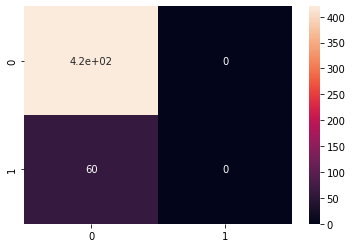

In [13]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

sns.heatmap(confusion_matrix(y_tst, pred), annot=True)

In [14]:
accuracy_score(y_pred=pred, y_true=y_tst)

0.875

0.875


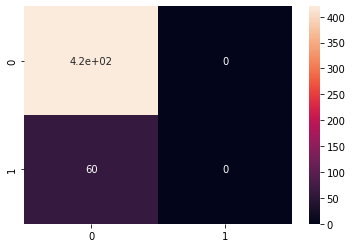

0.8770833333333333


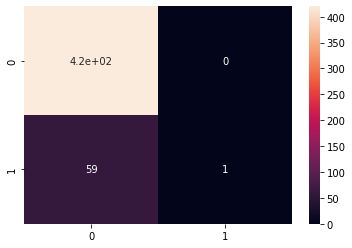

In [15]:
max = 0
for estimator in score["estimator"]:
    pred = estimator.predict(x_csp_average_test)
    acc = accuracy_score(y_pred=pred, y_true=y_tst)
    if acc > max:
        print(acc)
        max = acc
        sns.heatmap(confusion_matrix(y_tst, pred), annot=True)
        plt.show()

Conclusion

On remarque une bonne accuracy, mais celle ci est due à la mauvaise répartition des classes, il faut donc travailler sur ce point pour espérer avoir un meilleur recall

## Model selection

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression

models = {
    "dummy" : DummyClassifier(),
    "linear" : LinearRegression(),
    "KNN" : KNeighborsClassifier(),
    "tree" : DecisionTreeClassifier(),
    "forest" : RandomForestClassifier(),
    "SVM" : LinearSVC(),
    "MLP" : MLPClassifier(),
}

def get_best_score(scores):
    max = 0
    for estimator in scores["estimator"]:
        pred = estimator.predict(x_csp_average_test)
        acc = accuracy_score(y_pred=pred, y_true=y_tst)
        if acc > max:
            print(acc)
            max = acc
            sns.heatmap(confusion_matrix(y_tst, pred), annot=True)
            plt.show()
    return max

## Sampling

<AxesSubplot: >

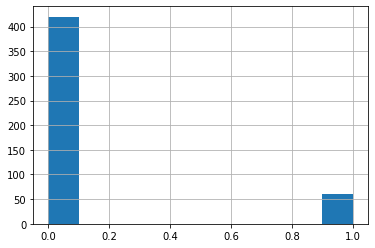

In [16]:
y = pd.Series(y)
y.hist()

On remaques que les classes sont très disproportionnées et que le modèles à donc des difficultés à apprendre

<AxesSubplot: >

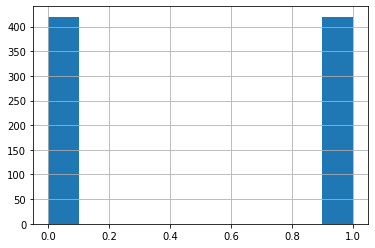

In [17]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()
X_smote, y_smote = sm.fit_resample(X2, y)
y_smote.hist()

In [22]:
score_SMOTE = cross_validate(estimator=classifier, cv=cv, return_estimator=True, X=X_smote, y=y_smote, scoring="accuracy", n_jobs = -1)
score_SMOTE

{'fit_time': array([0.40199733, 0.41300106, 0.35700083, 0.54599786, 0.3640008 ,
        0.35899997, 0.35599709, 0.45899963, 0.43599892, 0.52400064,
        0.60899949, 0.43600249, 0.41600037, 0.47700119, 0.40999866,
        0.38800144, 0.37899685, 0.3759923 , 0.37801528, 0.36699724,
        0.42699862, 0.39999914, 0.39099574, 0.39599752, 0.44499874,
        0.50400615, 0.49699831, 0.51099896, 0.44400096, 0.35899615,
        0.4410007 , 0.38400149, 0.43600178, 0.45800066, 0.37399793,
        0.38900208, 0.42500615, 0.40799928, 0.39299941, 0.37400055,
        0.3840003 , 0.37700391, 0.35499644, 0.42800045, 0.40199494,
        0.36499596, 0.43000031, 0.35600138, 0.38800216, 0.36999869,
        0.38199997, 0.44199944, 0.42300034, 0.40099955, 0.40499949,
        0.38000154, 0.39500189, 0.38700962, 0.37099981, 0.3609972 ,
        0.3940022 , 0.39899921, 0.36800241, 0.36499786, 0.34699917,
        0.43299818, 0.3889997 , 0.38100123, 0.35099459, 0.42400002,
        0.36899734, 0.40999937, 0.35

0.7666666666666667


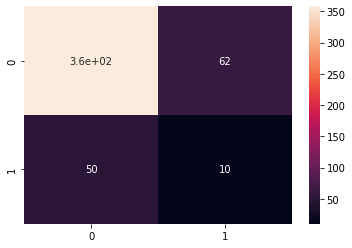

0.78125


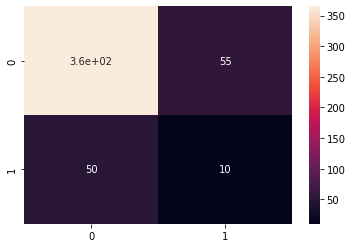

0.7833333333333333


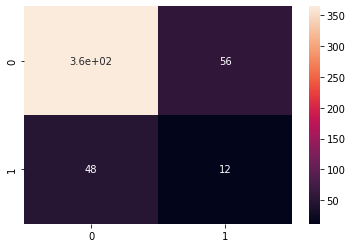

0.7854166666666667


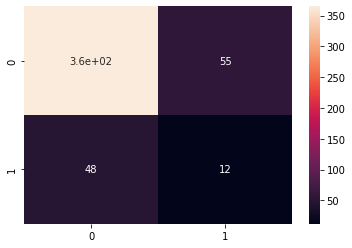

In [23]:
max = 0
for estimator in score_SMOTE["estimator"]:
    pred = estimator.predict(x_csp_average_test)
    acc = accuracy_score(y_pred=pred, y_true=y_tst)
    if acc > max:
        print(acc)
        max = acc
        sns.heatmap(confusion_matrix(y_tst, pred), annot=True)
        plt.show()